In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cost = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/COST.csv', index_col='Date', parse_dates=True)['Adj Close']
WMT = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/WMT.csv', index_col='Date', parse_dates=True)['Adj Close']
TGT = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/TGT.csv', index_col='Date', parse_dates=True)['Adj Close']
DG = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/DG.csv', index_col='Date', parse_dates=True)['Adj Close']

In [3]:
combined=pd.concat([cost, TGT, DG, WMT], axis=1)
combined.columns=['costco','Target','Dollar_General', 'Walmart']
combined

,costco,Target,Dollar_General,Walmart
Date,,,,
2016-09-06,140.896622,60.674061,68.342621,65.758080
2016-09-07,138.739395,60.847187,68.105331,64.911324
2016-09-08,136.805038,60.120117,67.080215,64.704163
2016-09-09,134.335831,59.721989,66.994766,63.325943
2016-09-12,135.218338,59.981625,68.366478,64.803238
...,...,...,...,...
2021-08-27,450.339996,249.179993,225.250000,146.520004
2021-08-30,455.929993,249.360001,225.360001,147.699997
2021-08-31,455.489990,246.979996,222.910004,148.100006


In [5]:
log_returns=np.log(combined/combined.shift(1))

In [6]:
log_returns

,costco,Target,Dollar_General,Walmart
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,0.002849,-0.003478,-0.012960
2016-09-08,-0.014040,-0.012021,-0.015166,-0.003197
2016-09-09,-0.018214,-0.006644,-0.001275,-0.021530
2016-09-12,0.006548,0.004338,0.020268,0.023060
...,...,...,...,...
2021-08-27,0.002290,0.000883,-0.002882,-0.005649
2021-08-30,0.012336,0.000722,0.000488,0.008021
2021-08-31,-0.000966,-0.009590,-0.010931,0.002705


In [42]:
l=len(log_returns.columns)
l
equalweightage=l *[1/l]
equalweightage

[0.25, 0.25, 0.25, 0.25]

In [9]:
weights=np.random.random(l)
weights/np.sum(weights)

array([0.58671814, 0.01837928, 0.22172773, 0.17317486])

In [10]:
def generateWeights(l):
    weights=np.random.random(l)
    return weights/np.sum(weights)

In [11]:
generateWeights(5)

array([0.32959331, 0.01432952, 0.06250092, 0.22197156, 0.3716047 ])

In [12]:
def calculateReturns(weights,log_returns):
    return np.sum(log_rets.mean()*weights)*252
    

In [16]:
log_ret_cov=log_returns.cov()

In [14]:
def calculateVolatility(weights, log_ret_cov):
    annualized_cov=np.dot(log_ret_cov*252,weights)
    vol=np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [17]:
calculateVolatility(weights,log_ret_cov)

0.23882135374189356

In [18]:
log_rets=np.log(combined/combined.shift(1))
log_rets_cov=log_rets.cov()

In [22]:
mc_portfolio_ret=[]
mc_portfolio_vol=[]
mc_weights=[]

for simulation in range (5000):
    weights=generateWeights(l=4)
    mc_weights.append(weights)
    simulation_returns= calculateReturns(weights,log_returns)
    mc_portfolio_ret.append(simulation_returns)
    simulation_volatility=calculateVolatility(weights,log_ret_cov)
    mc_portfolio_vol.append(simulation_volatility)

In [23]:
len(mc_portfolio_ret)

5000

In [24]:
mc_sharpe=np.array(mc_portfolio_ret/np.array(mc_portfolio_vol))

Text(0, 0.5, 'Returns')

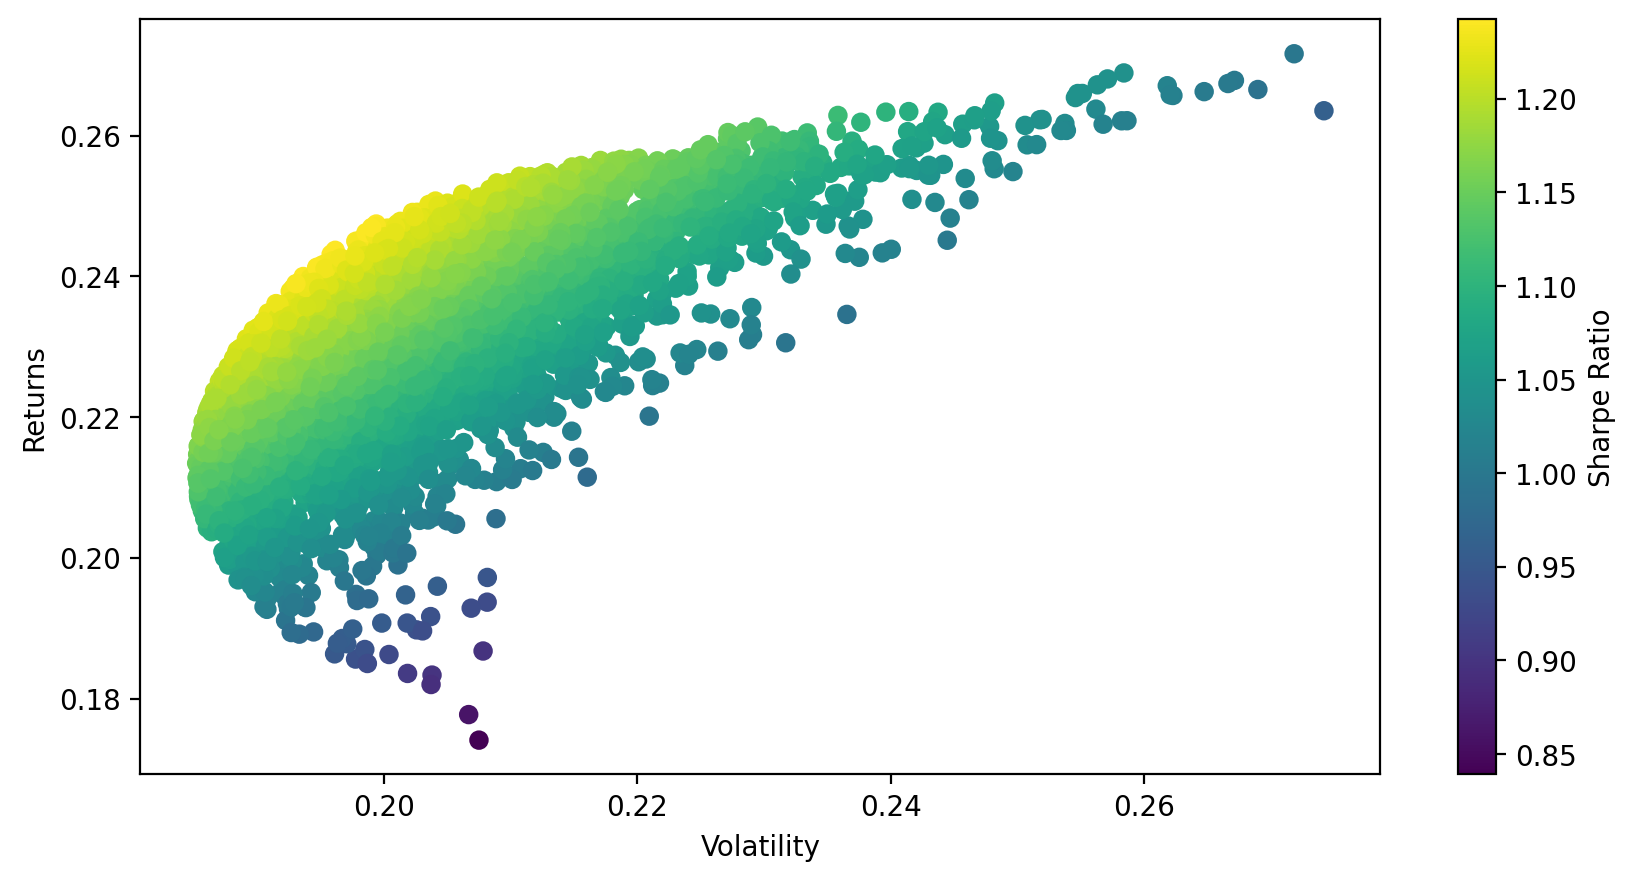

In [25]:
plt.figure(dpi=200, figsize=(10,5))
plt.scatter(mc_portfolio_vol, mc_portfolio_ret, c=mc_sharpe)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')

In [30]:
maxSR=np.argmax(mc_sharpe)

In [33]:
mc_weights[maxSR]

array([0.59751962, 0.18020362, 0.19688733, 0.02538943])

In [34]:
from scipy.optimize import minimize

In [35]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

In [36]:
#minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

In [37]:
def minimizingFunc(weights):
    #minimizing negative sharpe ratio is the same as maximizing sharpe ratio
    # so I will use a minimizing function on the neg sharpe
    return -1* (calculateReturns(weights,log_returns)/ calculateVolatility(weights,log_ret_cov))

In [38]:
bounds=tuple((0,1) for n in range(l))
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [39]:
sum_constraint= ({'type':'eq', 'fun':lambda weights: np.sum(weights)-1})

In [43]:
equalweightage

[0.25, 0.25, 0.25, 0.25]

In [44]:
minimize(fun=minimizingFunc,
        x0=equalweightage,
        bounds=bounds,
        constraints=sum_constraint)

     fun: -1.2451267775967916
     jac: array([-3.51712108e-04,  1.11974776e-03,  3.20374966e-05,  5.83363324e-02])
 message: 'Optimization terminated successfully'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.58456806, 0.17679025, 0.23864169, 0.        ])

In [45]:
#x: array([0.58456806, 0.17679025, 0.23864169, 0.        ])
#this is the optimal weightage of each stock
#based off historic data it suggests a weightage of 0 in Walmart 
#58.45% in Costco, 17.67% in Target, 23.86% in Dollar General

<AxesSubplot:xlabel='Date'>

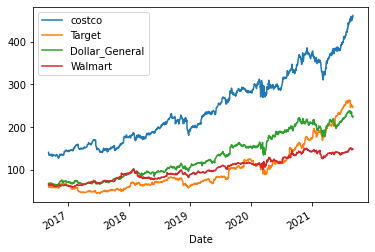

In [46]:
combined.plot()